In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./Protocol/subject101.dat',sep = ' ', header= None)

In [40]:
df.head()

,timestamps,id,heart_rate,F1,F2,F3,F4,F5,F6,F7,...,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


In [22]:
columns_name = ['timestamps','id','heart_rate']
for i in range(df.shape[1]-3):
    columns_name.append('F' +str(i+1))
print(columns_name)
df.columns = columns_name

['timestamps', 'id', 'heart_rate', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51']


In [24]:
 df.describe()

,timestamps,id,heart_rate,F1,F2,F3,F4,F5,F6,F7,...,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51
count,376417.000000,376417.000000,34389.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,...,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.0,375090.0,375090.0,375090.0
mean,1890.460000,5.525765,124.135479,32.429895,-3.349118,6.278528,3.407735,-3.290532,6.303530,3.572275,...,-0.000110,0.000361,0.013872,-50.873072,-4.103087,10.433775,1.0,0.0,0.0,0.0
std,1086.623725,6.617002,24.000340,1.236379,6.365465,5.196436,3.383241,6.395511,5.217042,3.369418,...,0.996037,0.603546,1.786058,25.724727,30.615311,29.524187,0.0,0.0,0.0,0.0
min,8.380000,0.000000,78.000000,30.000000,-127.649000,-81.234400,-34.124800,-56.984200,-42.797200,-22.052200,...,-11.688700,-7.807450,-11.619400,-172.865000,-137.908000,-109.289000,1.0,0.0,0.0,0.0
25%,949.420000,0.000000,104.000000,31.437500,-7.840210,3.591230,1.502020,-7.718755,3.635865,1.693380,...,-0.190940,-0.047853,-0.308403,-63.485375,-28.488200,-9.834780,1.0,0.0,0.0,0.0
50%,1890.460000,3.000000,125.000000,32.812500,-2.982460,6.009140,3.464280,-2.923560,6.049510,3.674220,...,-0.001233,0.003658,-0.002747,-53.249850,-5.071440,11.097900,1.0,0.0,0.0,0.0
75%,2831.500000,7.000000,136.000000,33.500000,1.669090,8.621120,5.551850,1.769210,8.605695,5.726600,...,0.067853,0.168119,0.057149,-36.340800,20.731550,33.179775,1.0,0.0,0.0,0.0
max,3772.540000,24.000000,183.000000,33.875000,26.145800,106.898000,132.295000,19.110700,62.060600,53.617100,...,13.142500,6.410380,9.377020,97.525500,123.306000,124.806000,1.0,0.0,0.0,0.0


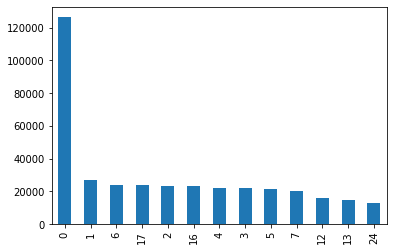

In [114]:
df['id'].value_counts().plot.bar()
plt.show()

In [26]:
df_1 = df.drop(columns=['F48','F49', 'F50','F51'],axis=0)
df_1.describe()

,timestamps,id,heart_rate,F1,F2,F3,F4,F5,F6,F7,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
count,376417.000000,376417.000000,34389.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,374963.000000,...,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000,375090.000000
mean,1890.460000,5.525765,124.135479,32.429895,-3.349118,6.278528,3.407735,-3.290532,6.303530,3.572275,...,-2.194919,9.385298,0.461362,-1.769552,-0.000110,0.000361,0.013872,-50.873072,-4.103087,10.433775
std,1086.623725,6.617002,24.000340,1.236379,6.365465,5.196436,3.383241,6.395511,5.217042,3.369418,...,3.720882,5.532037,6.652477,3.421688,0.996037,0.603546,1.786058,25.724727,30.615311,29.524187
min,8.380000,0.000000,78.000000,30.000000,-127.649000,-81.234400,-34.124800,-56.984200,-42.797200,-22.052200,...,-133.640000,-46.950900,-61.898600,-48.253400,-11.688700,-7.807450,-11.619400,-172.865000,-137.908000,-109.289000
25%,949.420000,0.000000,104.000000,31.437500,-7.840210,3.591230,1.502020,-7.718755,3.635865,1.693380,...,-3.354192,8.870140,-1.980000,-2.931093,-0.190940,-0.047853,-0.308403,-63.485375,-28.488200,-9.834780
50%,1890.460000,3.000000,125.000000,32.812500,-2.982460,6.009140,3.464280,-2.923560,6.049510,3.674220,...,-1.733430,9.629720,-0.105864,-1.284310,-0.001233,0.003658,-0.002747,-53.249850,-5.071440,11.097900
75%,2831.500000,7.000000,136.000000,33.500000,1.669090,8.621120,5.551850,1.769210,8.605695,5.726600,...,-0.523223,9.985893,2.146390,-0.074993,0.067853,0.168119,0.057149,-36.340800,20.731550,33.179775
max,3772.540000,24.000000,183.000000,33.875000,26.145800,106.898000,132.295000,19.110700,62.060600,53.617100,...,83.884500,61.969300,62.023800,44.231200,13.142500,6.410380,9.377020,97.525500,123.306000,124.806000


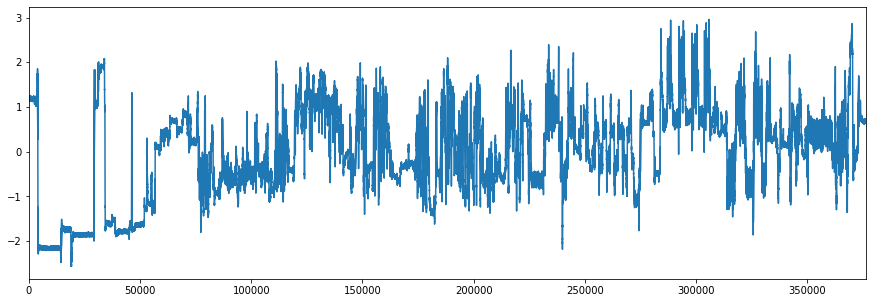

In [80]:
df_1['F30'].plot(figsize = (15,5))

In [51]:
df_1=df_1.interpolate()

In [92]:
df_1

,timestamps,id,heart_rate,F1,F2,F3,F4,F5,F6,F7,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
0,8.38,0,-0.839332,-1.963838,0.898844,0.447269,0.031498,0.896027,0.471397,-0.063430,...,0.563028,0.046849,-0.303601,0.608119,0.009081,0.013962,-0.017067,-0.400707,-1.137185,-2.324977
1,8.39,0,-0.839332,-1.963838,0.869988,0.440502,0.076225,0.889060,0.430965,0.021868,...,0.531890,0.041395,-0.312691,0.599374,-0.005846,-0.009044,-0.007021,-0.348543,-1.134964,-2.337905
2,8.40,0,-0.839332,-1.963838,0.899054,0.447332,0.042878,0.875032,0.428210,0.048795,...,0.614808,0.044110,-0.308149,0.599323,0.003777,-0.001116,0.005363,-0.383096,-1.152015,-2.333655
3,8.41,0,-0.839332,-1.963838,0.852153,0.433364,0.075758,0.879741,0.428167,0.048786,...,0.604499,0.044154,-0.314951,0.617061,0.003939,-0.034991,-0.000917,-0.370375,-1.130769,-2.333509
4,8.42,0,-0.839332,-1.963838,0.876421,0.491649,0.087519,0.863381,0.439901,0.057742,...,0.573504,0.046867,-0.317221,0.617052,0.013494,-0.025055,-0.008807,-0.413588,-1.151169,-2.329233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376412,3772.50,0,0.160660,-1.559575,0.844312,0.195943,0.691112,0.837635,0.052444,0.699960,...,0.582323,0.079468,-0.117374,0.602248,0.049663,-0.014670,0.003183,-0.309259,-1.048311,-0.730736
376413,3772.51,0,0.160660,-1.559575,0.857431,0.305606,0.725047,0.841042,0.214584,0.685958,...,0.519842,0.079491,-0.115097,0.611082,0.043009,0.039466,0.000258,-0.313756,-1.051520,-0.751712
376414,3772.52,0,0.160660,-1.559575,0.851667,0.407808,0.701600,0.848976,0.336155,0.694493,...,0.561559,0.076752,-0.124187,0.602314,-0.014187,0.041722,0.006795,-0.322486,-1.037164,-0.726324
376415,3772.53,0,0.160660,-1.559575,0.871137,0.481081,0.770031,0.844942,0.428871,0.703150,...,0.551040,0.082189,-0.128726,0.606720,0.047939,-0.060220,0.006563,-0.308940,-1.062844,-0.722512


In [76]:
mean = df_1.iloc[:, 2:].mean()
std = df_1.iloc[:,2:].std()
std.replace(0, 1, inplace=True)
df_1.iloc[:,2:] = (df_1.iloc[:, 2:] - mean) / std

In [77]:
df_1.describe()

,timestamps,id,heart_rate,F1,F2,F3,F4,F5,F6,F7,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
count,376417.000000,376417.000000,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,...,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05,3.764170e+05
mean,1890.460000,5.525765,3.760641e-14,8.576196e-14,2.767705e-16,3.748066e-16,-6.446435e-17,2.669423e-16,-5.873779e-16,-5.551835e-16,...,6.615793e-17,1.225897e-16,8.851914e-17,9.656675e-16,2.288589e-17,-6.584833e-17,-6.665775e-18,-6.060815e-16,-1.985145e-16,-5.717871e-16
std,1086.623725,6.617002,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,8.380000,0.000000,-1.922658e+00,-1.963838e+00,-1.950707e+01,-1.685099e+01,-1.109341e+01,-8.386385e+00,-9.415744e+00,-7.603506e+00,...,-3.531809e+01,-1.017876e+01,-9.364093e+00,-1.358715e+01,-1.172771e+01,-1.293455e+01,-6.510459e+00,-4.745206e+00,-4.370009e+00,-4.058134e+00
25%,949.420000,0.000000,-8.393323e-01,-8.015821e-01,-7.041478e-01,-5.172153e-01,-5.630735e-01,-6.909064e-01,-5.113716e-01,-5.568751e-01,...,-3.117594e-01,-9.352880e-02,-3.673064e-01,-3.399183e-01,-1.926136e-01,-8.065615e-02,-1.815341e-01,-4.891332e-01,-7.969042e-01,-6.873713e-01
50%,1890.460000,3.000000,3.566138e-02,3.101407e-01,5.735502e-02,-5.270192e-02,1.724989e-02,5.700233e-02,-4.940403e-02,3.063813e-02,...,1.237922e-01,4.377066e-02,-8.581224e-02,1.414818e-01,-5.300427e-04,4.810573e-03,-8.788680e-03,-9.186334e-02,-3.228087e-02,2.264278e-02
75%,2831.500000,7.000000,4.939914e-01,8.660022e-01,7.884910e-01,4.505614e-01,6.333406e-01,7.913133e-01,4.410098e-01,6.382133e-01,...,4.492442e-01,1.087582e-01,2.526669e-01,4.953320e-01,6.905191e-02,2.788731e-01,2.489917e-02,5.628447e-01,8.113968e-01,7.722976e-01
max,3772.540000,24.000000,2.452311e+00,1.169199e+00,4.629938e+00,1.937496e+01,3.809991e+01,3.500181e+00,1.069223e+01,1.485312e+01,...,2.312889e+01,9.500015e+00,9.242886e+00,1.344623e+01,1.318796e+01,1.061755e+01,5.240973e+00,5.773697e+00,4.164352e+00,3.874641e+00


In [71]:
def batch_generator(training_data, sequence_length=15, window_size = 10):
    """
    Generator function for creating random batches of training-data for many to many models
    """
    feature_number = training_data.shape[1]
    window_number = training_data.shape[0]-window_size+1
    Batch_size = int(window_number/sequence_length)
    temp_data_shape = (window_number,window_size,feature_number)
    temp_data = np.zeros(shape=temp_data_shape)
    for window in range(window_number):
       temp_data[window] = training_data.iloc[window:window+window_size,:]
    #temp_data = tf.reshape(training_data, temp_data_shape)
    
    x_shape = (Batch_size, sequence_length, window_size, feature_number-2)
    x_batch = np.zeros(shape=x_shape, dtype=np.float32)
    y_shape = (Batch_size,sequence_length)
    y_batch = np.zeros(shape=y_shape, dtype=np.float32)
    
    
    for Batch in range (Batch_size):
        for seq in range(sequence_length):
            y_batch[Batch,seq] = temp_data[Batch*sequence_length+seq,-1,1]
            x_batch[Batch,seq] = temp_data[Batch*sequence_length+seq,:,2:]
    x_batch = np.expand_dims(x_batch, axis=4)
    y_batch = np.expand_dims(y_batch, axis=2)
    return x_batch, y_batch

In [72]:
sequence_length = 3
window_size = 20
kernel_size = 3

In [81]:
x_batch, y_batch= batch_generator(df_1,sequence_length=sequence_length, window_size=window_size)

In [82]:
x_batch

array([[[[[-0.8393323 ],
          [-1.9638379 ],
          [ 0.8988438 ],
          ...,
          [-0.40070748],
          [-1.1371855 ],
          [-2.3249767 ]],

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.8699883 ],
          ...,
          [-0.34854296],
          [-1.1349638 ],
          [-2.3379047 ]],

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.8990541 ],
          ...,
          [-0.38309628],
          [-1.1520152 ],
          [-2.333655  ]],

         ...,

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.91011703],
          ...,
          [-0.3787003 ],
          [-1.1451509 ],
          [-2.3168304 ]],

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.86258686],
          ...,
          [-0.3481617 ],
          [-1.1601505 ],
          [-2.342381  ]],

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.898045  ],
          ...,
          [-0.38750395],
          [-1.1377343 ],
          

In [87]:
xf =y_batch.mean()

In [89]:
y_batch = tf.keras.utils.to_categorical(y_batch)

In [95]:
y_batch.shape

(125466, 3, 25)

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers.convolutional import Conv3D
#from tensorflow.keras.layers.convolutional_recurrent import ConvLSTM2D
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from ConvLSTM2D_2 import ConvLSTM2D_2

In [103]:
model =Sequential()
# input 的shape 应该是 （时间，行-window，列-sensor， channels）
# 参数个数怎么算？？？为啥改变filter个数，参数个数不是按比例增长
# 增加batch ？ 增加 dropout??
model.add(ConvLSTM2D_2(filters=10, kernel_size=(kernel_size, x_batch.shape[3]),input_shape=(None, window_size, x_batch.shape[3], 1), padding='valid', return_sequences=True))
model.add(keras.layers.BatchNormalization())
model.add(ConvLSTM2D_2(filters=20, kernel_size=(kernel_size, 1),padding='valid', return_sequences=True))
model.add(keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Reshape((100,10)))
#model.add(self_attention())
#model.add(keras.layers.BatchNormalization())
model.add(TimeDistributed(Flatten()))
#model.add(Flatten())
model.add(TimeDistributed(Dense(units = 100, activation = "linear")))
model.add(tf.compat.v2.keras.layers.Dropout(0.4))
#model.add(TimeDistributed(Dense(units = 2, activation = "softmax")))
model.add(TimeDistributed(Dense(units = 25, activation = "softmax")))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [104]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_2_4 (ConvLSTM2D (None, None, 16, 1, 10)   66100     
_________________________________________________________________
batch_normalization_4 (Batch (None, None, 16, 1, 10)   40        
_________________________________________________________________
conv_lst_m2d_2_5 (ConvLSTM2D (None, None, 12, 1, 20)   18080     
_________________________________________________________________
batch_normalization_5 (Batch (None, None, 12, 1, 20)   80        
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 240)         0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 100)         24100     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)        

In [105]:
model.fit(x_batch,y_batch, batch_size=15, epochs=30, validation_split=0.1)

Train on 112919 samples, validate on 12547 samples
Epoch 1/30
112919/112919 [==============================] - 184s 2ms/sample - loss: 0.4103 - categorical_accuracy: 0.8638 - val_loss: 5.4357 - val_categorical_accuracy: 0.6064
Epoch 2/30
112919/112919 [==============================] - 178s 2ms/sample - loss: 0.2226 - categorical_accuracy: 0.9254 - val_loss: 5.4879 - val_categorical_accuracy: 0.6082
Epoch 3/30
112919/112919 [==============================] - 183s 2ms/sample - loss: 0.1714 - categorical_accuracy: 0.9426 - val_loss: 5.6056 - val_categorical_accuracy: 0.5972
Epoch 4/30
112919/112919 [==============================] - 180s 2ms/sample - loss: 0.1427 - categorical_accuracy: 0.9528 - val_loss: 5.6899 - val_categorical_accuracy: 0.5940
Epoch 5/30
112919/112919 [==============================] - 178s 2ms/sample - loss: 0.1237 - categorical_accuracy: 0.9590 - val_loss: 5.7074 - val_categorical_accuracy: 0.6062
Epoch 6/30
112919/112919 [==============================] - 177s 2ms/

KeyboardInterrupt: 

In [117]:
from sklearn.model_selection import KFold

def cross_validate(model,x_batch,y_batch, split_size=10):
    results = []
    kf = KFold(n_splits=split_size)
    for train_idx, val_idx in kf.split(x_batch, y_batch):
        train_x = train_x_all[train_idx]
        train_y = train_y_all[train_idx]
        val_x = train_x_all[val_idx]
        val_y = train_y_all[val_idx]
        model.fit(train_x,train_y, batch_size=15, epochs=5, validation_split=0.1)
        results.append(session.run(accuracy, feed_dict={x: val_x, y: val_y}))
    return results

In [119]:
with tf.Session() as session:
  result = cross_validate(model,x_batch,y_batch)
  print( "Cross-validation result: %s" % result)
  print ("Test accuracy: %f" % session.run(accuracy, feed_dict={x: test_x, y: test_y}))

AttributeError: module 'tensorflow' has no attribute 'Session'